# Лабораторная работа 2
# Фильтр Калмана

## Описание объекта

Рассмотрим модель горизонтального движения надводного судна. Предположим, что сила тяги компенсирует продольное гидродинамическое сопротивление и движение происходит с постоянной скоростью $V_0 = V_x = const$.



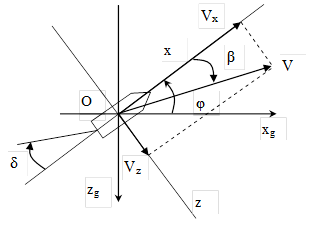

In [363]:
%matplotlib inline
from IPython.display import Image
Image('model.png', width=500)

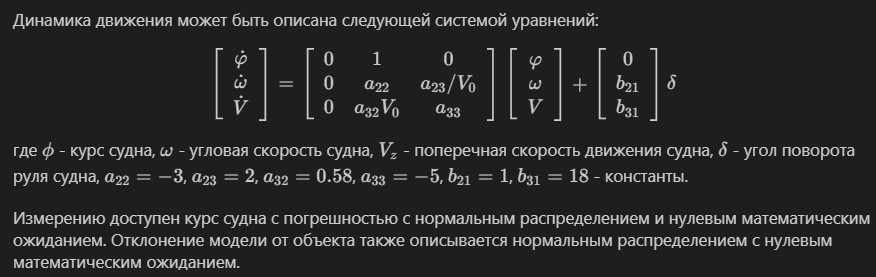

In [364]:
Image('theory.jpg', width=500)

## Задание

1. Задать параметры судна.
2. Задать среднеквадратические отклонения модели (курса, угловой скорости и продольной скорости) и датчика.
3. Построить траекторию движения судна при 4 различных положениях руля.
4. Построить фильтр Калмана для оценки состояния судна.
5. Построить графики изменения, измерения и оценки переменных состояния.
6. Получить формулы для определения глобальных координат судна.
7. Построить траеткорию движения судна, ее измерение и оценку.

### ***Часть 1.*** Задание параметров судна и необходимых констант

In [365]:
import numpy as np

# V0 = Vx = const
V0 = 2
a22 = -3
a23 = 2
a32 = 0.58
a33 = -5
b21 = 1
b31 = 18

Зададим время симуляции, шаг и seed для генератора псевдослучайных чисел, чтобы обеспечить повторяемость результатов

In [366]:
simulation_time = 20
dt = 0.1

seed = 50
np.random.seed(seed)
time = np.arange(0, simulation_time, dt)

Зададим параметры матриц из уравнения состояния, а также сделаем переход из дискретной формы в непрерывную. Зададим положение руля

In [367]:
A = np.array([[0, 1, 0], [0, a22, a23/V0], [0, a32*V0, a33]])
B = np.array([[0], [b21], [b31]])
C = np.array([[1, 0, 0]])

A = np.eye(3) + A * dt  # переход в непрерывное пространство
B = B * dt

### ***Часть 2.*** Задание среднеквадратического отклонения модели (курса, угловой скорости и продольной скорости) и датчика

In [368]:
sigma_fi = 0.05  # сигма для курса
sigma_w = 0.1  # сигма для угловой скорости
sigma_V0 = 0.1  # сигма для продольной скорости

# зададим матрицу ковариации основе среднеквадратических отклонений
Ex = np.array([[sigma_fi**2, sigma_fi * sigma_w, sigma_fi * sigma_V0],
               [sigma_w*sigma_fi, sigma_w**2, sigma_w*sigma_V0],
               [sigma_V0*sigma_fi, sigma_V0*sigma_w, sigma_V0**2]])


# Наш датчик
sigma_z = 0.5  # сигма для датчика
Ez = sigma_z ** 2  # матрица ковариации модели измерений

# будем задавать шум как случайный шум для каждой из переменных
noises = np.array([[np.random.normal(0, sigma_fi)],[np.random.normal(0, sigma_w)],[np.random.normal(0, sigma_V0)]])

### ***Часть 3.*** Траектория движения судна при четырёх разных углах положения руля

In [369]:
x = np.array([[0], [0], [0]])  # вектор состояния в начальный момент времени

delta = [-np.pi/3, -np.pi/12, np.pi/6, np.pi/4]  # различные варианты положения руля

u = round(delta[0],2)  # управление при определённом положении руля


fi, w, v, z = [], [], [], []

for t in time:
    noises = np.array([[np.random.normal(0, sigma_fi)],[np.random.normal(0, sigma_w)],[np.random.normal(0, sigma_V0)]])

    x = np.matmul(A, x) + B * u + noises  # первое уравнение системы
    z_noise = np.random.normal(0, sigma_z)

    y = float(np.matmul(C, x)) + z_noise  # второе уравнение системы с учётом ошибки датчика

    fi.append(x[0][0])
    w.append(x[1][0])
    v.append(x[2][0])
    z.append(y)

Text(0.5, 1.0, 'Изменение угла курса, скорости и угловой скорости при повороте руля на угол -1.05 рад')

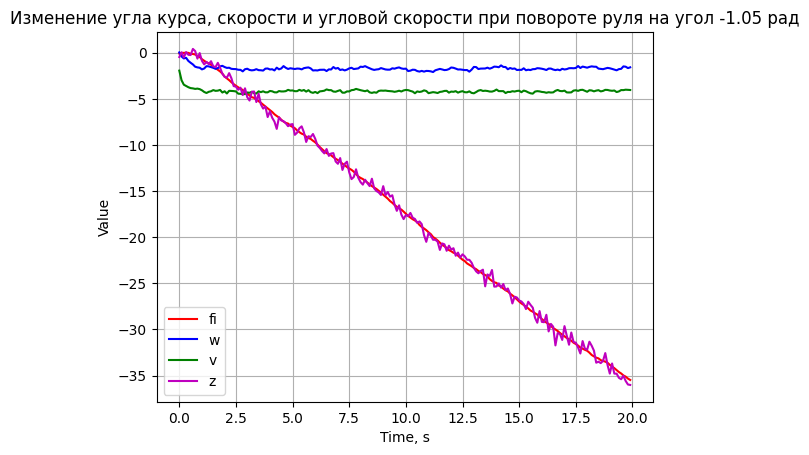

In [370]:
import matplotlib.pyplot as plt
plt.plot(time, fi, c='r')
plt.plot(time, w, c='b')
plt.plot(time, v, c='g')
plt.plot(time, z, c='m')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Value')
plt.legend(['fi','w','v','z'])
plt.title(f'Изменение угла курса, скорости и угловой скорости при повороте руля на угол {u} рад')

Text(0.5, 1.0, 'Изменение угла курса, скорости и угловой скорости при повороте руля на угол -0.26 рад')

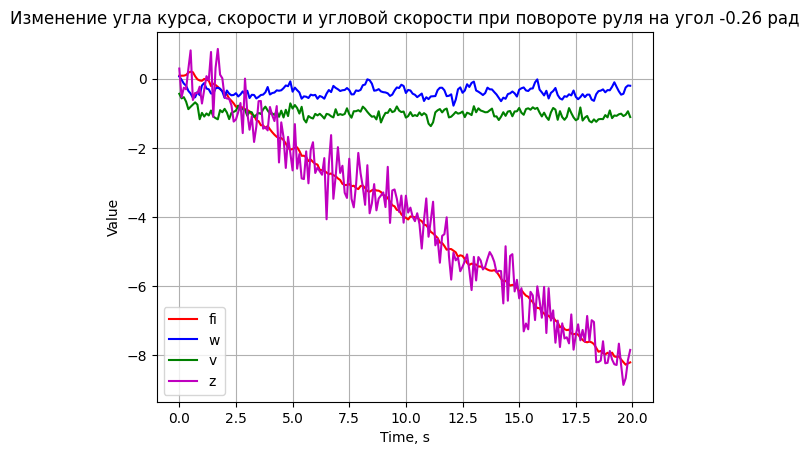

In [371]:
x = np.array([[0], [0], [0]])  # вектор состояния в начальный момент времени

delta = [-np.pi/3, -np.pi/12, np.pi/6, np.pi/4]  # различные варианты положения руля

u = round(delta[1],2)  # управление при определённом положении руля


fi, w, v, z = [], [], [], []

for t in time:
    noises = np.array([[np.random.normal(0, sigma_fi)],[np.random.normal(0, sigma_w)],[np.random.normal(0, sigma_V0)]])

    x = np.matmul(A, x) + B * u + noises  # первое уравнение системы
    z_noise = np.random.normal(0, sigma_z)

    y = float(np.matmul(C, x)) + z_noise  # второе уравнение системы с учётом ошибки датчика

    fi.append(x[0][0])
    w.append(x[1][0])
    v.append(x[2][0])
    z.append(y)

plt.plot(time, fi, c='r')
plt.plot(time, w, c='b')
plt.plot(time, v, c='g')
plt.plot(time, z, c='m')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Value')
plt.legend(['fi','w','v','z'])
plt.title(f'Изменение угла курса, скорости и угловой скорости при повороте руля на угол {u} рад')

Text(0.5, 1.0, 'Изменение угла курса, скорости и угловой скорости при повороте руля на угол 0.52 рад')

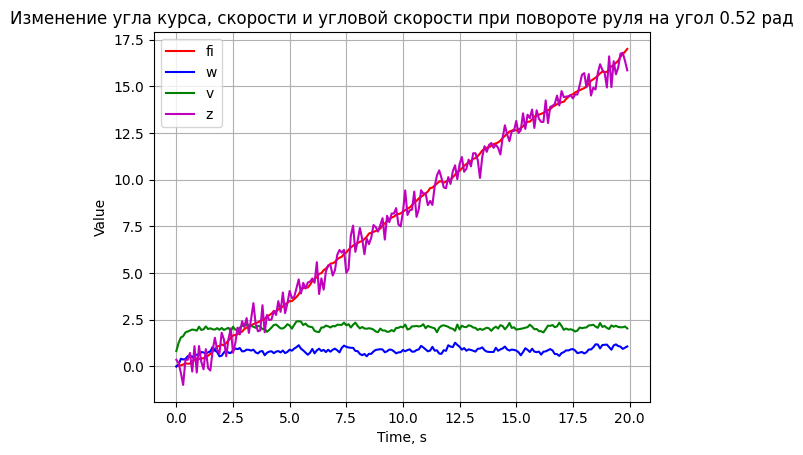

In [372]:
x = np.array([[0], [0], [0]])  # вектор состояния в начальный момент времени

delta = [-np.pi/3, -np.pi/12, np.pi/6, np.pi/4]  # различные варианты положения руля

u = round(delta[2],2)  # управление при определённом положении руля


fi, w, v, z = [], [], [], []

for t in time:
    noises = np.array([[np.random.normal(0, sigma_fi)],[np.random.normal(0, sigma_w)],[np.random.normal(0, sigma_V0)]])

    x = np.matmul(A, x) + B * u + noises  # первое уравнение системы
    z_noise = np.random.normal(0, sigma_z)

    y = float(np.matmul(C, x)) + z_noise  # второе уравнение системы с учётом ошибки датчика

    fi.append(x[0][0])
    w.append(x[1][0])
    v.append(x[2][0])
    z.append(y)

plt.plot(time, fi, c='r')
plt.plot(time, w, c='b')
plt.plot(time, v, c='g')
plt.plot(time, z, c='m')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Value')
plt.legend(['fi','w','v','z'])
plt.title(f'Изменение угла курса, скорости и угловой скорости при повороте руля на угол {u} рад')

Text(0.5, 1.0, 'Изменение угла курса, скорости и угловой скорости при повороте руля на угол 0.79 рад')

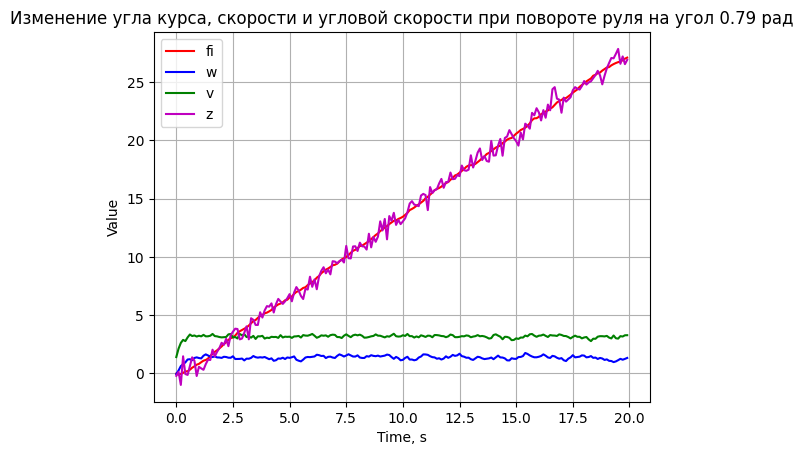

In [373]:
x = np.array([[0], [0], [0]])  # вектор состояния в начальный момент времени

delta = [-np.pi/3, -np.pi/12, np.pi/6, np.pi/4]  # различные варианты положения руля

u = round(delta[3],2)  # управление при определённом положении руля


fi, w, v, z = [], [], [], []

for t in time:
    noises = np.array([[np.random.normal(0, sigma_fi)],[np.random.normal(0, sigma_w)],[np.random.normal(0, sigma_V0)]])

    x = np.matmul(A, x) + B * u + noises  # первое уравнение системы
    z_noise = np.random.normal(0, sigma_z)

    y = float(np.matmul(C, x)) + z_noise  # второе уравнение системы с учётом ошибки датчика

    fi.append(x[0][0])
    w.append(x[1][0])
    v.append(x[2][0])
    z.append(y)

plt.plot(time, fi, c='r')
plt.plot(time, w, c='b')
plt.plot(time, v, c='g')
plt.plot(time, z, c='m')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Value')
plt.legend(['fi','w','v','z'])
plt.title(f'Изменение угла курса, скорости и угловой скорости при повороте руля на угол {u} рад')

Text(0.5, 1.0, 'Изменение угла курса, скорости и угловой скорости при постепенном повороте угла руля')

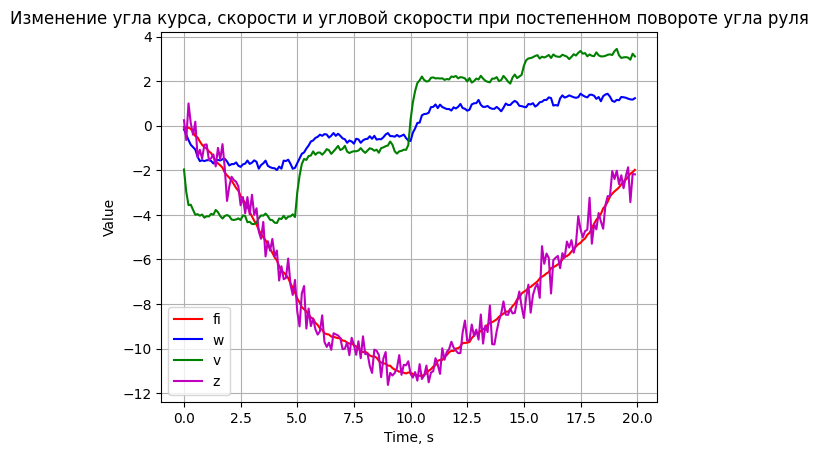

In [374]:
x = np.array([[0], [0], [0]])  # вектор состояния в начальный момент времени

delta = [-np.pi/3, -np.pi/12, np.pi/6, np.pi/4]  # различные варианты положения руля


fi, w, v, z = [], [], [], []

for t in time:
    if t < 5:
        u = round(delta[0], 2)
    if t >= 5 and t < 10:
        u = round(delta[1], 2)
    if t >= 10 and t < 15:
        u = round(delta[2], 2)
    if t >= 15:
        u = round(delta[3], 2)
        
    noises = np.array([[np.random.normal(0, sigma_fi)],[np.random.normal(0, sigma_w)],[np.random.normal(0, sigma_V0)]])

    x = np.matmul(A, x) + B * u + noises  # первое уравнение системы
    z_noise = np.random.normal(0, sigma_z)

    y = float(np.matmul(C, x)) + z_noise  # второе уравнение системы с учётом ошибки датчика

    fi.append(x[0][0])
    w.append(x[1][0])
    v.append(x[2][0])
    z.append(y)

plt.plot(time, fi, c='r')
plt.plot(time, w, c='b')
plt.plot(time, v, c='g')
plt.plot(time, z, c='m')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Value')
plt.legend(['fi','w','v','z'])
plt.title(f'Изменение угла курса, скорости и угловой скорости при постепенном повороте угла руля')

### ***Часть 4.*** Построение фильтра Калмана для оценки состояния судна

In [375]:
x = np.array([[0], [0], [0]])  # вектор состояния в начальный момент времени

delta = [-np.pi/3, -np.pi/12, np.pi/6, np.pi/4]  # различные варианты положения руля

u = round(delta[0],2)  # управление при определённом положении руля


fi, w, v, z = [], [], [], []

for t in time:
    noises = np.array([[np.random.normal(0, sigma_fi)],[np.random.normal(0, sigma_w)],[np.random.normal(0, sigma_V0)]])

    x = np.matmul(A, x) + B * u + noises  # первое уравнение системы
    z_noise = np.random.normal(0, sigma_z)

    y = float(np.matmul(C, x)) + z_noise  # второе уравнение системы с учётом ошибки датчика

    fi.append(x[0][0])
    w.append(x[1][0])
    v.append(x[2][0])
    z.append(y)

In [376]:
fi_est, w_est, v_est = [], [], []   # массивы для записи оценки 

Sigma = Ex.copy()  # матрица ковариации

x = np.array([[0], [0], [0]])  # состояние

u = round(delta[0], 2) 

for t in range(len(time)):
    
    x_pred = np.matmul(A,x) + B * u  # вычисляем предсказание, основываясь на модели

    Sigma_pred = np.matmul(np.matmul(A, Sigma), A.T) + Ex  # делаем оценку для матрицы ковариации с учётом матрицы ковариации и с учётом нелинейности динамики

    K_t_1 = np.linalg.inv(np.matmul(np.matmul(C,Sigma_pred), C.T) + Ez)  # вычисляем коэффициент Калмана

    K = np.matmul(Sigma_pred,np.matmul(C.T, K_t_1))

    x = x_pred + K * (z[t] - np.matmul(C, x_pred))  # учитываем как предсказание, так и показания датчика
    Sigma = np.matmul(np.eye(3) - np.matmul(K,C), Sigma_pred)  # обновляем значение матрицы ковариации

    fi_est.append(x[0][0])
    w_est.append(x[1][0])
    v_est.append(x[2][0])



### ***Часть 5.*** Графики изменения, измерения и оценки состояния

Text(0.5, 1.0, 'Поведение угла курса, его оценки оценки и измерения')

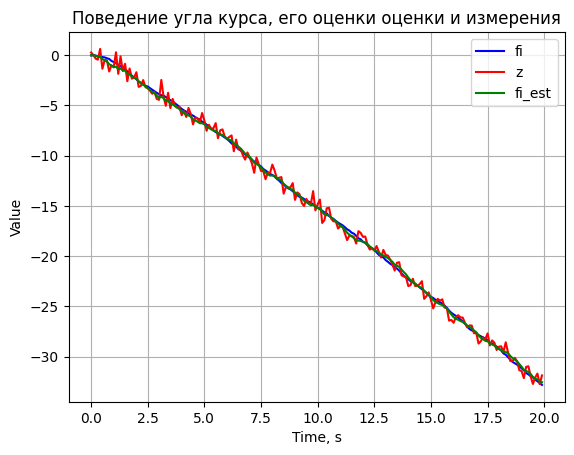

In [377]:
plt.plot(time, fi, c='b')
plt.plot(time, z, c='r')
plt.plot(time, fi_est, c='g')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Value')
plt.legend(['fi', 'z', 'fi_est'])
plt.title('Поведение угла курса, его оценки оценки и измерения')

Text(0.5, 1.0, 'Поведение угла угловой скорости и её оценки')

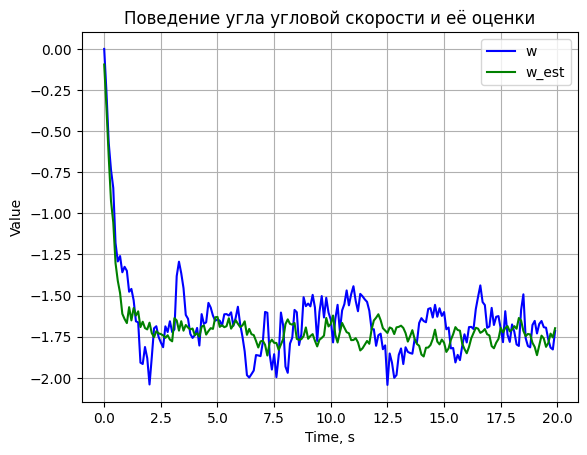

In [378]:
plt.plot(time, w, c='b')
plt.plot(time, w_est, c='g')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Value')
plt.legend(['w','w_est'])
plt.title('Поведение угла угловой скорости и её оценки')

Text(0.5, 1.0, 'Поведение скорости и её оценки')

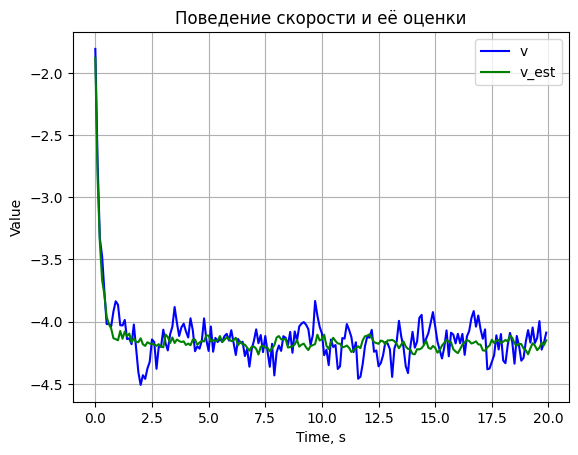

In [379]:
plt.plot(time, v, c='b')
plt.plot(time, v_est, c='g')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Value')
plt.legend(['v','v_est'])
plt.title('Поведение скорости и её оценки')

Также можно построить график для сравнения ошибки в случае работы с оценкой и в случае работы датчика для угла курса

Text(0.5, 1.0, 'Сравнение ошибок')

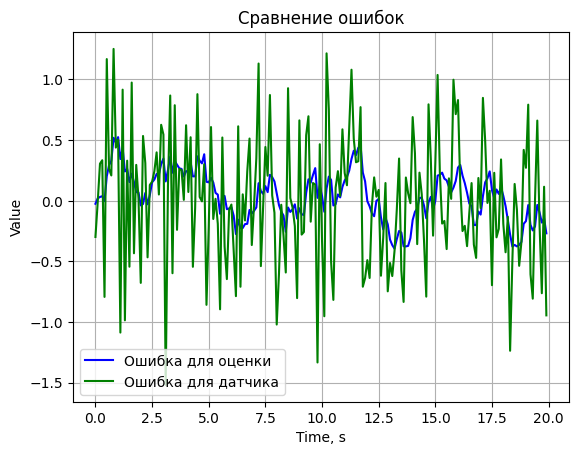

In [380]:
error_fi_fi_est = [x - y for x,y in zip(fi, fi_est)]
error_fi_z = [x - y for x,y in zip(fi, z)]

plt.plot(time, error_fi_fi_est, c='b')
plt.plot(time, error_fi_z, c='g')
plt.grid()
plt.xlabel('Time, s')
plt.ylabel('Value')
plt.legend(['Ошибка для оценки','Ошибка для датчика'])
plt.title('Сравнение ошибок')

Видно, что для оценки ошибка значительно ниже, чем для датчика

### ***Часть 6.*** Получить формулы для определения глобальных координат судна.

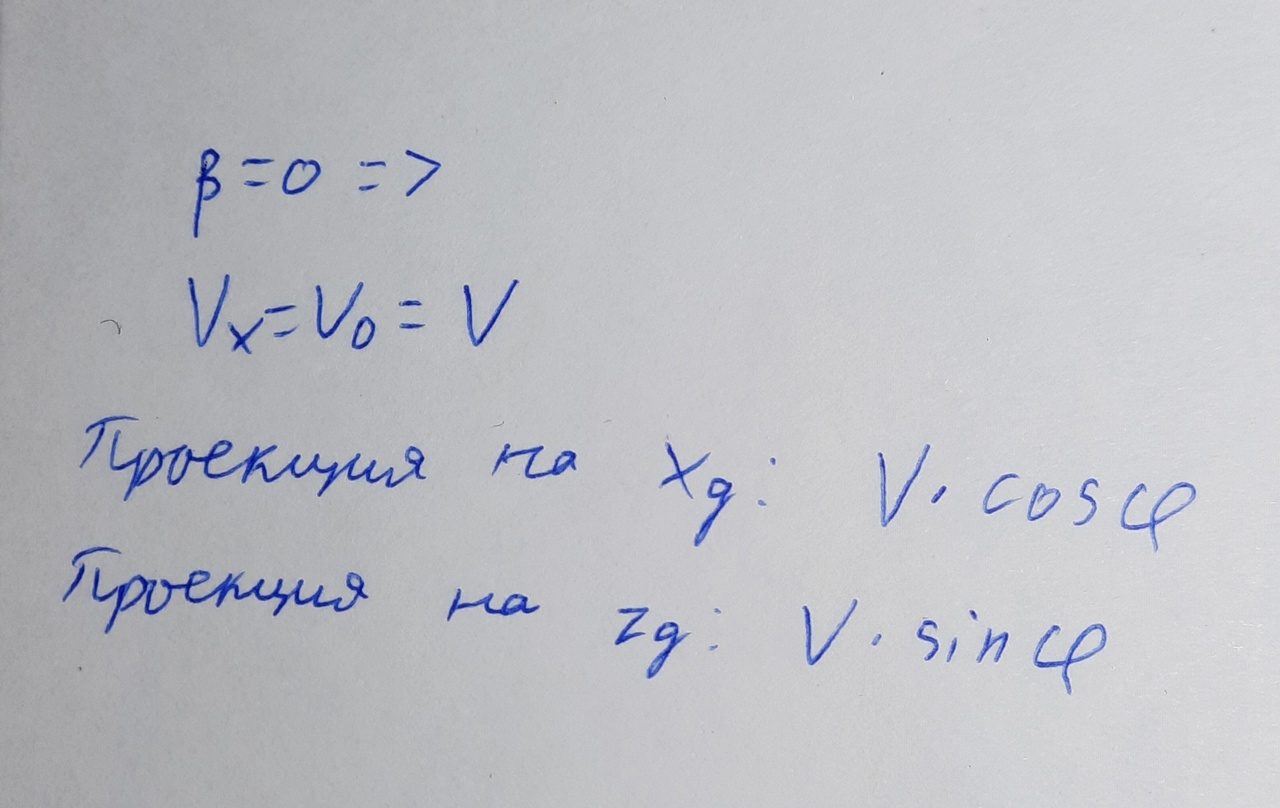

In [381]:
Image('GarMyoXWZiQ.jpg', width=500)

In [382]:
x_position, z_position, x_position_est, z_position_est, x_position_z, z_position_z = [], [], [], [], [], []
x_0, z_0 = 0, 0 # начальное положение корабля
x_0_est, z_0_est = 0, 0  # оценка начального положения корабля
x_0_z, z_0_z = 0, 0  # данные измерений для начального положения корабля

pos_x = x_0
pos_z = z_0

pos_x_z, pos_z_z = x_0_z, z_0_z
pos_x_est, pos_z_est = x_0_est, z_0_est


for i in range(len(fi)):
    pos_x += v[i] * np.cos(fi[i]) * dt
    pos_z += v[i] * np.sin(fi[i]) * dt

    pos_x_z += v[i] * np.cos(z[i]) * dt
    pos_z_z += v[i] * np.sin(z[i]) * dt

    pos_x_est += v_est[i] * np.cos(fi_est[i]) * dt
    pos_z_est += v_est[i] * np.sin(fi_est[i]) * dt

    x_position.append(pos_x)
    z_position.append(pos_z)
    x_position_z.append(pos_x_z)
    z_position_z.append(pos_z_z)
    x_position_est.append(pos_x_est)
    z_position_est.append(pos_z_est)
    
    

### ***Часть 7.*** Построить траекторию движения судна, её оценку и измерение

In [383]:
x = np.array([[0], [0], [0]])  # вектор состояния в начальный момент времени

delta = [-np.pi/3, -np.pi/12, np.pi/6, np.pi/4]  # различные варианты положения руля

u = round(delta[2],2)  # управление при определённом положении руля


fi, w, v, z = [], [], [], []

for t in time:
    if t < 5:
        u = round(delta[0], 2)
    if t >= 5 and t < 10:
        u = round(delta[1], 2)
    if t >= 10 and t < 15:
        u = round(delta[2], 2)
    if t >= 15:
        u = round(delta[3], 2)

    noises = np.array([[np.random.normal(0, sigma_fi)],[np.random.normal(0, sigma_w)],[np.random.normal(0, sigma_V0)]])

    x = np.matmul(A, x) + B * u + noises  # первое уравнение системы
    z_noise = np.random.normal(0, sigma_z)

    y = float(np.matmul(C, x)) + z_noise  # второе уравнение системы с учётом ошибки датчика

    fi.append(x[0][0])
    w.append(x[1][0])
    v.append(x[2][0])
    z.append(y)

fi_est, w_est, v_est = [], [], []   # массивы для записи оценки 

Sigma = Ex.copy()  # матрица ковариации

x = np.array([[0], [0], [0]])  # состояние

u = round(delta[2], 2) 

for t in range(len(time)):
    if t < 50:
        u = round(delta[0], 2)
    if t >= 50 and t < 100:
        u = round(delta[1], 2)
    if t >= 100 and t < 150:
        u = round(delta[2], 2)
    if t >= 150:
        u = round(delta[3], 2)
    
    x_pred = np.matmul(A,x) + B * u  # вычисляем предсказание, основываясь на модели

    Sigma_pred = np.matmul(np.matmul(A, Sigma), A.T) + Ex  # делаем оценку для матрицы ковариации с учётом матрицы ковариации и с учётом нелинейности динамики

    K_t_1 = np.linalg.inv(np.matmul(np.matmul(C,Sigma_pred), C.T) + Ez)  # вычисляем коэффициент Калмана

    K = np.matmul(Sigma_pred,np.matmul(C.T, K_t_1))

    x = x_pred + K * (z[t] - np.matmul(C, x_pred))  # учитываем как предсказание, так и показания датчика
    Sigma = np.matmul(np.eye(3) - np.matmul(K,C), Sigma_pred)  # обновляем значение матрицы ковариации

    fi_est.append(x[0][0])
    w_est.append(x[1][0])
    v_est.append(x[2][0])

x_position, z_position, x_position_est, z_position_est, x_position_z, z_position_z = [], [], [], [], [], []
x_0, z_0 = 0, 0 # начальное положение корабля
x_0_est, z_0_est = 0, 0  # оценка начального положения корабля
x_0_z, z_0_z = 0, 0  # данные измерений для начального положения корабля

pos_x = x_0
pos_z = z_0

pos_x_z, pos_z_z = x_0_z, z_0_z
pos_x_est, pos_z_est = x_0_est, z_0_est


for i in range(len(fi)):
    pos_x += v[i] * np.cos(fi[i]) * dt
    pos_z += v[i] * np.sin(fi[i]) * dt

    pos_x_z += v[i] * np.cos(z[i]) * dt
    pos_z_z += v[i] * np.sin(z[i]) * dt

    pos_x_est += v_est[i] * np.cos(fi_est[i]) * dt
    pos_z_est += v_est[i] * np.sin(fi_est[i]) * dt

    x_position.append(pos_x)
    z_position.append(pos_z)
    x_position_z.append(pos_x_z)
    z_position_z.append(pos_z_z)
    x_position_est.append(pos_x_est)
    z_position_est.append(pos_z_est)

Text(0.5, 1.0, 'Траектория движения, её измерение и её оценка')

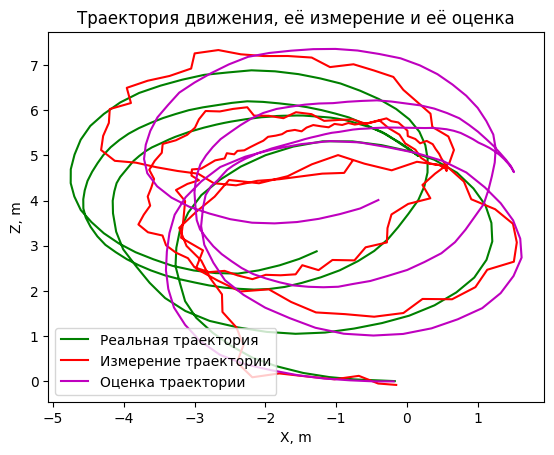

In [384]:
plt.plot(x_position, z_position, c='g')
plt.plot(x_position_z,z_position_z, c='r')
plt.plot(x_position_est, z_position_est, c='m')
plt.legend(['Реальная траектория', 'Измерение траектории', 'Оценка траектории'])
plt.xlabel('X, m')
plt.ylabel('Z, m')
plt.title('Траектория движения, её измерение и её оценка')

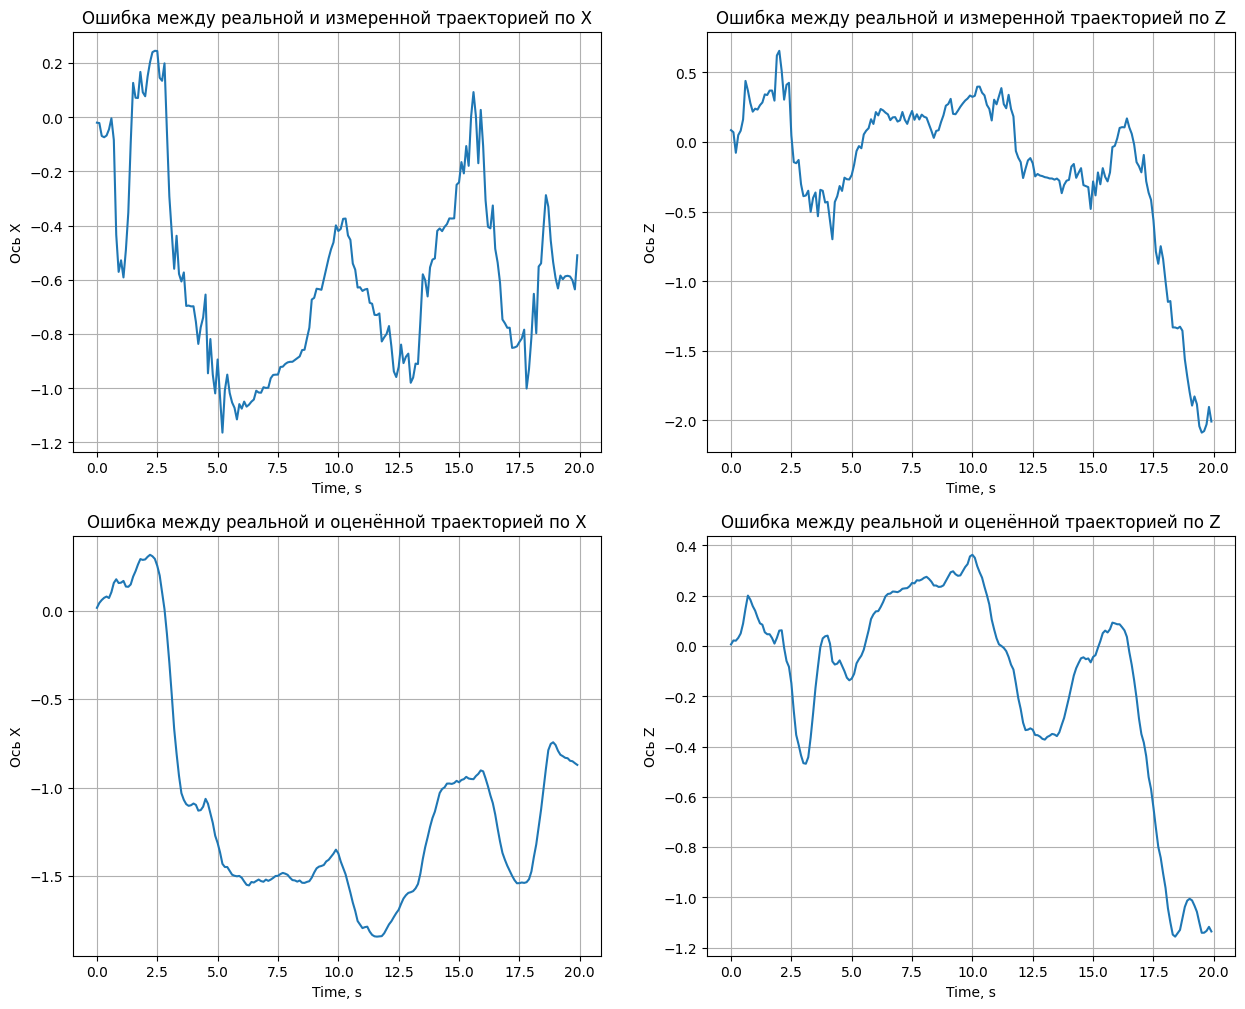

In [385]:
error_x_z = [x - y for x,y in zip(x_position, x_position_z)]
error_z_z = [x - y for x,y in zip(z_position, z_position_z)]
error_x_est = [x - y for x,y in zip(x_position, x_position_est)]
error_z_est = [x - y for x,y in zip(z_position, z_position_est)]


fig, axs = plt.subplots(2, 2, figsize=(15, 12))

axs[0, 0].set_title('Ошибка между реальной и измеренной траекторией по Х')
axs[0, 0].set_xlabel('Time, s')
axs[0, 0].set_ylabel('Ось X')

axs[0, 1].set_title('Ошибка между реальной и измеренной траекторией по Z')
axs[0, 1].set_xlabel('Time, s')
axs[0, 1].set_ylabel('Ось Z')

axs[1, 0].set_title('Ошибка между реальной и оценённой траекторией по Х')
axs[1, 0].set_xlabel('Time, s')
axs[1, 0].set_ylabel('Ось X')
axs[1, 1].set_title('Ошибка между реальной и оценённой траекторией по Z')
axs[1, 1].set_xlabel('Time, s')
axs[1, 1].set_ylabel('Ось Z')

axs[0, 0].plot(time, error_x_z)
axs[0, 0].grid(True)
axs[0, 1].plot(time, error_z_z)
axs[0, 1].grid(True)
axs[1, 0].plot(time, error_x_est)
axs[1, 0].grid(True)
axs[1, 1].plot(time, error_z_est)
axs[1, 1].grid(True)
plt.show()

### ***Выводы***
В ходе выполнения лабораторной были заданы параметры судна и среднеквадратические отклонения модели и датчика. Была построена траектория при 4 разных положения руля и построены графики для угла курса, угловой скорости и скорости движения судна. Построен фильтр Калмана для оценки состояния судна и данный фильтр показал ошибку меньше для значения угла курса, чем данные с датчика. \
Также были получены формулы для определения глобальных координат суда и построена траектория движения. Для траектории построен график измерения и оценки, а также выведены графики ошибки для измерения и оценки. По ним можно увидеть, что оценка траектории даёт меньшую величину ошибки для координаты Z, однако для координаты X ошибка, полученная на основе данных с датчика, меньше, чем для оценки. Также можно заметить, что для оценки график более плавный.